1) Clone https://github.com/adamnguyenitvn/UIT_bigdata_labs_2019

2) Open Forecasting.ipynb

3) Make a copy of Forecasting.ipynb, name it with your studentID.ipynb

4) Do the exercise

5) Push your Jupyter notebook to github

Note that you should use Python 3 for all exercises.

In [1]:
#make necesarry imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import sys, os
from contextlib import contextmanager
import matplotlib as mpl
import seaborn as sns
import sklearn

# Forecasting

In [2]:
df = pd.read_csv('data.csv')
df.head

<bound method NDFrame.head of     Period  Sales
0        1   5384
1        2   8081
2        3  10282
3        4   9156
4        5   6118
5        6   9139
6        7  12460
7        8  10717
8        9   7825
9       10   9693
10      11  15177
11      12  10990>

## 1. Visualize and interprete the pattern of this time-series

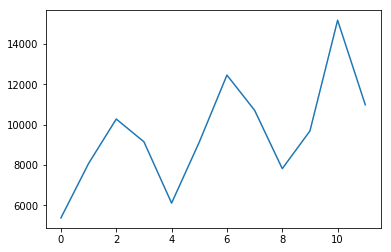

In [3]:
plt.plot(df['Sales'])
plt.show()

## 2. Predict future demand in the four next quarters without seasonality

### Using moving average

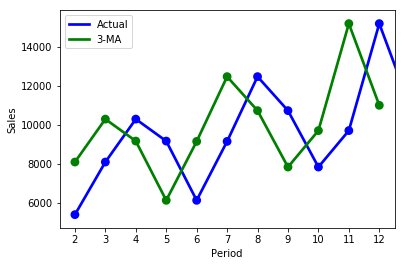

In [23]:
# Using moving average
def moving_average(df, k, to_period):
    moving_average_df = pd.DataFrame(columns=['Period','Sales'])
    # TODO: Add your code here
    for i in range(1,to_period):
        moving_average_df.loc[i] = df.loc[i]
        moving_average_df['Period'].loc[i+1] = 13
        moving_average_df['Period'] = moving_average_df['Period'].astype(int)
        for a in range(i,moving_average_df.shape[0]):
            moving_average_df.loc[moving_average_df.index[a],'Sales'] = np.round(((df.iloc[a,1]+ df.iloc[a+1,1] +df.iloc[a+2,1])/3),1)
            
        
 
    ...
    # End of your coding
    return moving_average_df

f, ax = plt.subplots(1, 1)
ma_df = moving_average(df,3,12)
sns.pointplot(x='Period', y='Sales', data=df, color='b')
sns.pointplot(x='Period', y='Sales', data=ma_df, color='g')
ax.legend(handles=ax.lines[::len(df)+1], labels=["Actual", "3-MA"])
plt.show()

### Exponential Smoothing

C:\Users\Nguyen Huy Cuong\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


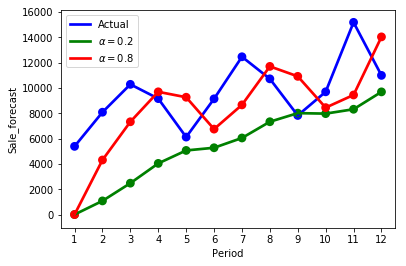

In [5]:
def exponential_smoothing(df, alpha):
    es_df = pd.DataFrame(columns=['Period','Sales'])
    for i in range(0, df.shape[0]):
        es_df.loc[i] = df.loc[i]
        es_df['Sale_forecast'] = 0
        es_df['Period'] = es_df['Period'].astype(int)
        for k in range(0, es_df.shape[0]):
            es_df['Sale_forecast'].loc[k+1] = np.round((alpha * es_df['Sales'].loc[k]) + ((1- alpha) * es_df['Sale_forecast'].loc[k]),2)
    return es_df

f, ax = plt.subplots(1, 1)
es_df_02 = exponential_smoothing(df, 0.2)
es_df_08 = exponential_smoothing(df, 0.8)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df, color='b')
sns.pointplot(ax=ax, x='Period', y='Sale_forecast', data=es_df_02, color='g')
sns.pointplot(ax=ax, x='Period', y='Sale_forecast', data=es_df_08, color='r')

ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", r'$\alpha=0.2$', r"$\alpha=0.8$"])
plt.show()

# Using Linear Regression

In [6]:
def linear_regression(df):
    #y = a+b*x
    y_mean = df['Sales'].mean()
    alpha = 0.2
    # TODO: Add your code here
    df['Sale_forecast'] = 0
    for k in range(0, df.shape[0]):
         df['Sale_forecast'].loc[k+1] = np.round((alpha * df['Sales'].loc[k]) + ((1- alpha) * df['Sale_forecast'].loc[k]),2)
    df['XY'] = df['Sales'] * df['Sale_forecast']
    x_mean = df['Sale_forecast'].mean()
    XY_mean = df['XY'].mean()
    df['x_2'] = np.power(df['Sale_forecast'],2)
    x_2_mean = df['x_2'].mean()
    df['y_2'] = np.power(df['Sales'], 2)
    y_2_mean = df['y_2'].mean()
    lendf = len(df)
    x_mean_2 = np.power(x_mean,2)
    b = (XY_mean - (lendf * x_mean*y_mean))/(x_2_mean - (lendf * x_mean_2))
    a = y_mean - b*x_mean
    

    # End of your coding
           
    return a,b

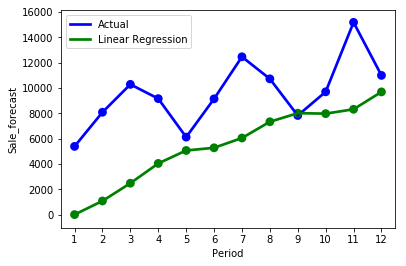

In [7]:
a,b = linear_regression(df)
linear_df = pd.DataFrame(columns=['Period','Sale_forecast'])
for m in range(1, 17):
    sale = a + b * m
    linear_df.loc[m-1] = [m,sale]
linear_df['Period'] = linear_df['Period'].astype(int)

f, ax = plt.subplots(1, 1)
sns.pointplot(ax=ax, x='Period', y='Sales', data=df, color='b')
sns.pointplot(ax=ax, x='Period', y='Sale_forecast', data=df, color='g')

ax.legend(handles=ax.lines[::len(df)+2], labels=["Actual", "Linear Regression"])
plt.show()

In [8]:
linear_df.head(3)

,Period,Sale_forecast
0,1,-184.207329
1,2,-182.411236
2,3,-180.615143


# 3. Predict future demand in the four next quarters with seasonality (Optional)

In [9]:
#season function
def get_season(row):
    if row['Period'] >= 5 and row['Period'] <= 8:
        return 'II'
    elif row['Period'] >= 9 and row['Period'] <= 12:
        return 'III'
    else:
        return 'I'
def get_seq(row):
    return row['Period']%4 and row['Period']%4 or 4

def predict_with_seasonality(df, months):
    # TODO: Add your code here
    ...
    # End of your coding
    return forecast_df

season_df = predict_with_seasonality(df, [13,14,15,16])

f, ax = plt.subplots(1, 1)
plt.plot(df['Period'], df['Sales'], c='y')
plt.plot(season_df['Period'], season_df['Sales'], c='r')
plt.show()

NameError: name 'forecast_df' is not defined

# 4.Evaluation: compare the above implemented methods

In [ ]:
eval_df = pd.read_csv('actual.csv')
eval_df = pd.concat([df, eval_df], ignore_index=True)
sns.pointplot(x='Period', y='Sales', data=eval_df, color='b')

In [ ]:
MAD = np.absolute(eval_df['Sales'][12:16] - moving_average(eval_df, 3, 16)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("3-MA", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.2)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.2", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.8)['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Exponential smoothing with alpha=0.8", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - linear_df['Sales'][12:16]).mean()
print("MAD of {0}: {1}".format("Linear Regression", MAD))
MAD = np.absolute(eval_df['Sales'][12:16] - season_df['Sales'][0:4]).mean()
print("MAD of {0}: {1}".format("Seasonality Method", MAD))

In [ ]:
MSE = (eval_df['Sales'][12:16] - moving_average(eval_df, 3, 16)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("3-MA", MSE))
MSE = (eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.2)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha=0.2", MSE))
MSE = (eval_df['Sales'][12:16] - exponential_smoothing(eval_df, 0.8)['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Exponential smoothing with alpha=0.8", MSE))
MSE = (eval_df['Sales'][12:16] - linear_df['Sales'][12:16])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Linear Regression", MSE))
MSE = (eval_df['Sales'][12:16] - season_df['Sales'][0:4])**2
MSE = MSE.mean()
print("MSE of {0}: {1}".format("Seasonality Method", MSE))

# Give your conclusion about the above forecastings